In [4]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image


In [5]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

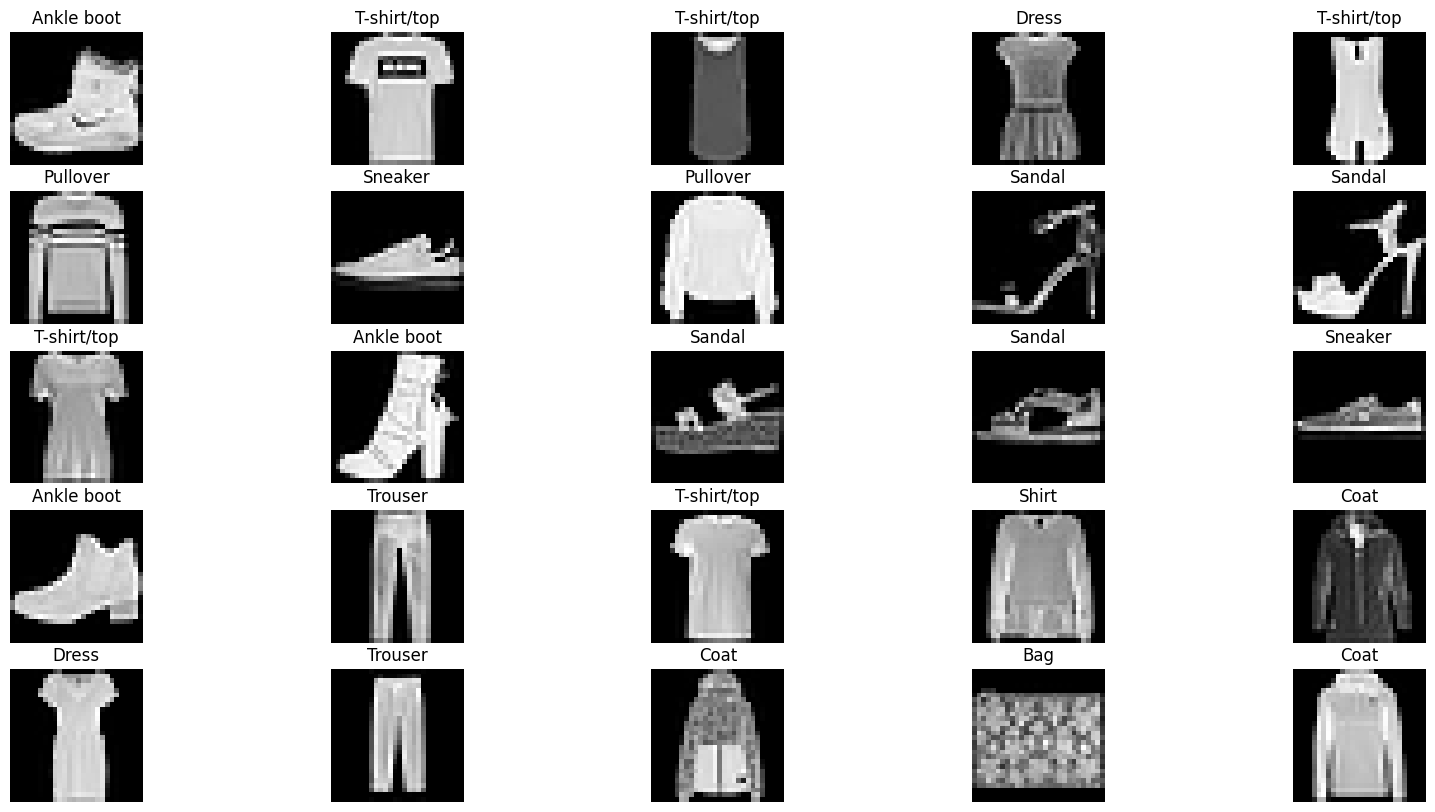

In [16]:
plt.figure(figsize=(20, 10))  # Adjust the figure size

label_dict = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

for i in range(25):
    # Original image
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'{label_dict[train_labels[i]]}')
    plt.axis('off')
    
plt.savefig('fashion_mnist.png')

In [31]:
X_train = train_images.reshape(train_images.shape[0], -1).astype('float32') / 255
X_test = test_images.reshape(test_images.shape[0], -1).astype('float32') / 255
y_train = train_labels
y_test = test_labels

In [20]:
from tensorflow.keras import layers

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))  # Change input_shape to (784,)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

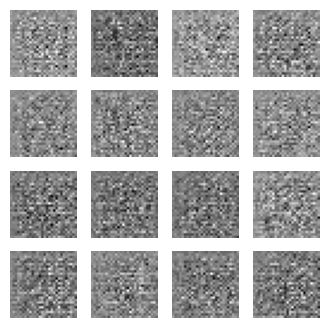

In [24]:
def generate_and_plot_images(generator, num_examples=16):
    noise = tf.random.normal([num_examples, 100])
    generated_images = generator(noise, training=False)

    plt.figure(figsize=(4, 4))
    for i in range(generated_images.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')
    plt.show()

# Create the generator
generator = make_generator_model()

# Generate and plot images
generate_and_plot_images(generator)

In [25]:
import numpy as np
import keras.backend as K
from keras.layers import Input, Dense, Activation, LeakyReLU, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [26]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [23]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.0019241]], shape=(1, 1), dtype=float32)


In [27]:
def make_simple_GAN(sample_size):

    K.clear_session() #clear out old keras models

    generator = Sequential()
    generator.add(Input(shape=(sample_size,)))
    generator.add(Dense(128, activation = LeakyReLU(alpha=0.01)))
    generator.add(Dense(784, activation ='tanh'))

    discriminator = Sequential()
    discriminator.add(Input(shape=(784,)))
    discriminator.add(Dense(128, activation = LeakyReLU(alpha=0.01)))
    discriminator.add(Dense(1, activation ='sigmoid'))

    gan = Sequential([
        generator,
        discriminator])

    discriminator.compile(optimizer = Adam(learning_rate=0.001),
                          loss = 'binary_crossentropy')
    gan.compile(optimizer = Adam(learning_rate=0.0001),
                loss = 'binary_crossentropy')

    return gan, generator, discriminator

In [29]:
def make_latent_samples(n_samples, sample_size):
    return np.random.normal(loc=0, scale=1, size=(n_samples, sample_size))

In [28]:
def make_trainable(model, trainable):
    for layer in model.layers:
        layer.trainable = trainable

In [30]:
def make_labels(size):
    return np.ones([size, 1]), np.zeros([size, 1])

1/1 [==============================] - 0s 79ms/step


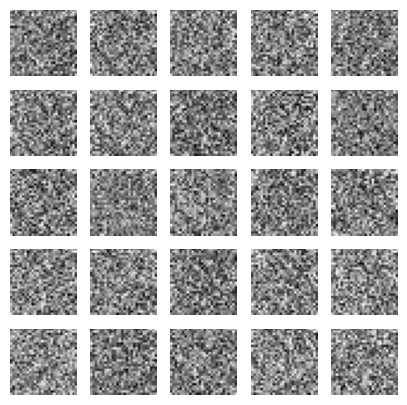

Epoch:   1/50 Discriminator Loss: 0.0925 Generator Loss: 4.2451
Epoch:   2/50 Discriminator Loss: 0.1473 Generator Loss: 3.1691
Epoch:   3/50 Discriminator Loss: 0.1553 Generator Loss: 3.0159
Epoch:   4/50 Discriminator Loss: 0.2245 Generator Loss: 2.7025
Epoch:   5/50 Discriminator Loss: 0.1626 Generator Loss: 2.7529
Epoch:   6/50 Discriminator Loss: 0.1142 Generator Loss: 3.0327
Epoch:   7/50 Discriminator Loss: 0.1362 Generator Loss: 3.1737
Epoch:   8/50 Discriminator Loss: 0.1844 Generator Loss: 3.1807
Epoch:   9/50 Discriminator Loss: 0.3569 Generator Loss: 3.5221
Epoch:  10/50 Discriminator Loss: 0.2211 Generator Loss: 3.4753
1/1 [==============================] - 0s 8ms/step


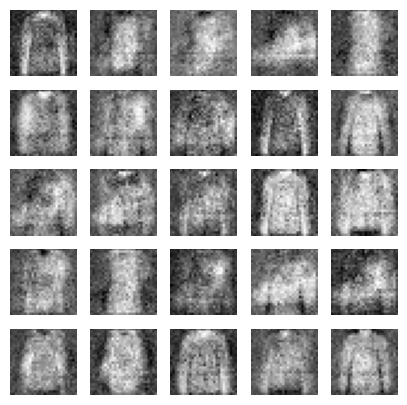

Epoch:  11/50 Discriminator Loss: 0.1936 Generator Loss: 2.9757
Epoch:  12/50 Discriminator Loss: 0.2093 Generator Loss: 3.0398
Epoch:  13/50 Discriminator Loss: 0.2405 Generator Loss: 3.0804
Epoch:  14/50 Discriminator Loss: 0.3234 Generator Loss: 2.2322
Epoch:  15/50 Discriminator Loss: 0.3715 Generator Loss: 3.4738
Epoch:  16/50 Discriminator Loss: 0.1529 Generator Loss: 3.1539
Epoch:  17/50 Discriminator Loss: 0.1706 Generator Loss: 2.4835
Epoch:  18/50 Discriminator Loss: 0.4345 Generator Loss: 3.1862
Epoch:  19/50 Discriminator Loss: 0.1890 Generator Loss: 3.1243
Epoch:  20/50 Discriminator Loss: 0.2011 Generator Loss: 2.6949
1/1 [==============================] - 0s 8ms/step


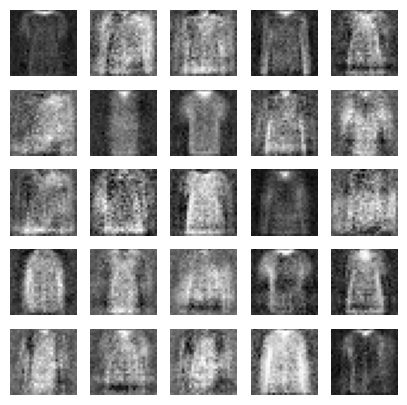

Epoch:  21/50 Discriminator Loss: 0.3323 Generator Loss: 2.8776
Epoch:  22/50 Discriminator Loss: 0.1812 Generator Loss: 2.9574
Epoch:  23/50 Discriminator Loss: 0.5249 Generator Loss: 1.9617
Epoch:  24/50 Discriminator Loss: 0.2537 Generator Loss: 2.2052
Epoch:  25/50 Discriminator Loss: 0.2029 Generator Loss: 2.6332
Epoch:  26/50 Discriminator Loss: 0.2788 Generator Loss: 2.9876
Epoch:  27/50 Discriminator Loss: 0.5837 Generator Loss: 1.8539
Epoch:  28/50 Discriminator Loss: 0.3880 Generator Loss: 2.4818
Epoch:  29/50 Discriminator Loss: 0.2699 Generator Loss: 2.7187
Epoch:  30/50 Discriminator Loss: 0.6350 Generator Loss: 2.3558
1/1 [==============================] - 0s 8ms/step


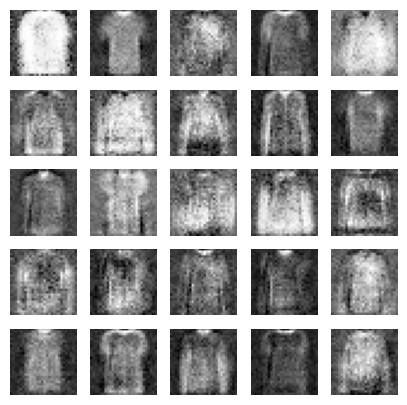

Epoch:  31/50 Discriminator Loss: 0.3762 Generator Loss: 2.6396
Epoch:  32/50 Discriminator Loss: 0.2782 Generator Loss: 2.1106
Epoch:  33/50 Discriminator Loss: 0.5969 Generator Loss: 1.5916
Epoch:  34/50 Discriminator Loss: 0.4846 Generator Loss: 2.3483
Epoch:  35/50 Discriminator Loss: 0.3128 Generator Loss: 2.9746
Epoch:  36/50 Discriminator Loss: 0.4215 Generator Loss: 3.0809
Epoch:  37/50 Discriminator Loss: 0.4623 Generator Loss: 2.3893
Epoch:  38/50 Discriminator Loss: 0.4907 Generator Loss: 3.2518
Epoch:  39/50 Discriminator Loss: 0.7277 Generator Loss: 2.1006
Epoch:  40/50 Discriminator Loss: 0.4379 Generator Loss: 3.3673
1/1 [==============================] - 0s 8ms/step


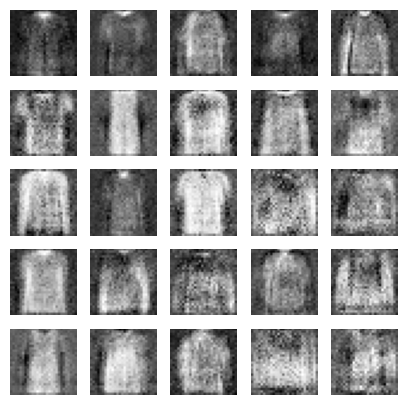

Epoch:  41/50 Discriminator Loss: 0.1694 Generator Loss: 2.9204
Epoch:  42/50 Discriminator Loss: 0.4111 Generator Loss: 2.7378
Epoch:  43/50 Discriminator Loss: 0.6934 Generator Loss: 2.7992
Epoch:  44/50 Discriminator Loss: 0.4321 Generator Loss: 2.2440
Epoch:  45/50 Discriminator Loss: 0.4343 Generator Loss: 2.5532
Epoch:  46/50 Discriminator Loss: 0.2933 Generator Loss: 2.3328
Epoch:  47/50 Discriminator Loss: 0.6578 Generator Loss: 2.4469
Epoch:  48/50 Discriminator Loss: 0.5060 Generator Loss: 1.9682
Epoch:  49/50 Discriminator Loss: 0.5188 Generator Loss: 2.4742
Epoch:  50/50 Discriminator Loss: 0.4629 Generator Loss: 3.0410


In [32]:
# hyperparameters
sample_size     = 100
epochs          = 50
batch_size      = 64
eval_size       = 16
smooth          = 0.1

# Labels for the batch size and the test size
y_train_real, y_train_fake = make_labels(batch_size)
y_eval_real,  y_eval_fake  = make_labels(eval_size)

# Create a GAN, a generator and a discriminator
gan, generator, discriminator = make_simple_GAN(sample_size)

losses = []
for e in range(epochs):
    if e % 10 == 0:  # Every 10 epochs
          latent_samples = make_latent_samples(25, sample_size)
          generated_digits = generator.predict(latent_samples)

          plt.figure(figsize=(5, 5))
          for i in range(25):
              img = generated_digits[i]
              img = (img / 2 + 0.5) * 255  # Rescale pixel values
              img = img.reshape(28, 28)    # Reshape flat array back to 28x28
              plt.subplot(5, 5, i + 1)
              plt.imshow(img, cmap='gray')
              plt.axis('off')
          plt.show()

    for i in range(len(X_train)//batch_size):
        # real MNIST digit images
        X_batch_real = X_train[i*batch_size:(i+1)*batch_size]

        # latent samples and the generated digit images
        latent_samples = make_latent_samples(batch_size, sample_size)
        X_batch_fake = generator.predict_on_batch(latent_samples)

        # train the discriminator to detect real and fake images
        make_trainable(discriminator, True)
        discriminator.train_on_batch(X_batch_real, y_train_real * (1 - smooth))
        discriminator.train_on_batch(X_batch_fake, y_train_fake)

        # train the generator via GAN
        make_trainable(discriminator, False)
        gan.train_on_batch(latent_samples, y_train_real)

        # Display generated digits during training to visualize improvement

    # evaluate
    X_eval_real = X_test[np.random.choice(len(X_test), eval_size, replace=False)]

    latent_samples = make_latent_samples(eval_size, sample_size)
    X_eval_fake = generator.predict_on_batch(latent_samples)

    d_loss = discriminator.test_on_batch(X_eval_real, y_eval_real)
    d_loss = d_loss + discriminator.test_on_batch(X_eval_fake, y_eval_fake)

    # The fake images are labeled a real to test if the discriminator can be fooled.
    g_loss = gan.test_on_batch(latent_samples, y_eval_real)

    losses.append((d_loss, g_loss))

    print("Epoch: {:>3}/{} Discriminator Loss: {:>6.4f} Generator Loss: {:>6.4f}".format(
        e+1, epochs, d_loss, g_loss))

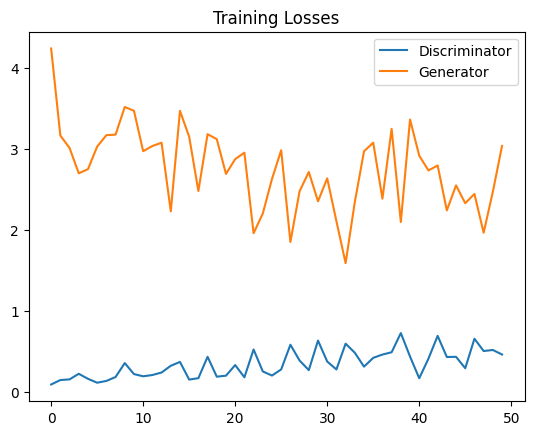

In [33]:
losses = np.array(losses)

plt.plot(losses[:, 0], label='Discriminator')
plt.plot(losses[:, 1], label='Generator')
plt.title("Training Losses")
plt.legend()

2/2 [==============================] - 0s 1ms/step


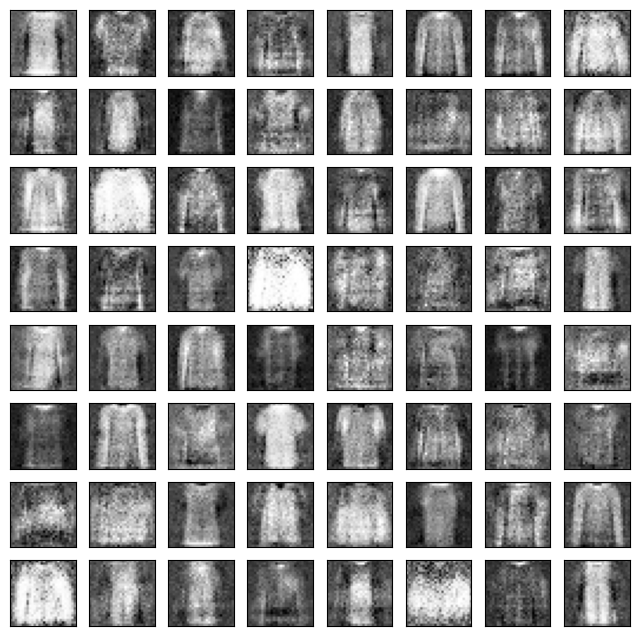

In [36]:
latent_samples = make_latent_samples(64, sample_size)
generated_digits = generator.predict(latent_samples)

plt.figure(figsize=(8, 8))

for i in range(64):
  img = generated_digits[i]
  img = (img / 2 + 1)* 255
  img = img.reshape(28, 28)
  plt.subplot(8, 8, i+1)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])

# They are not great but genrally distiguishable. Impressive that my computer could generate it 